<a href="https://colab.research.google.com/github/Akita20/Practice/blob/master/Sentiment_Analysis_using_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analysis project focused on the IMDB Movie Reviews dataset using a GRU.

**Problem Statement**

Develop a sentiment analysis model using a Gated Recurrent Neural Network (GRU) to accurately classify movie reviews from the IMDB Movie Reviews dataset as either positive, negative, or neutral.

**Datasets**

* **IMDB Movie Reviews Dataset:** This dataset is readily available on Kaggle ([https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)). It contains 50,000 movie reviews with corresponding sentiment labels.

```
# This is formatted as code
```



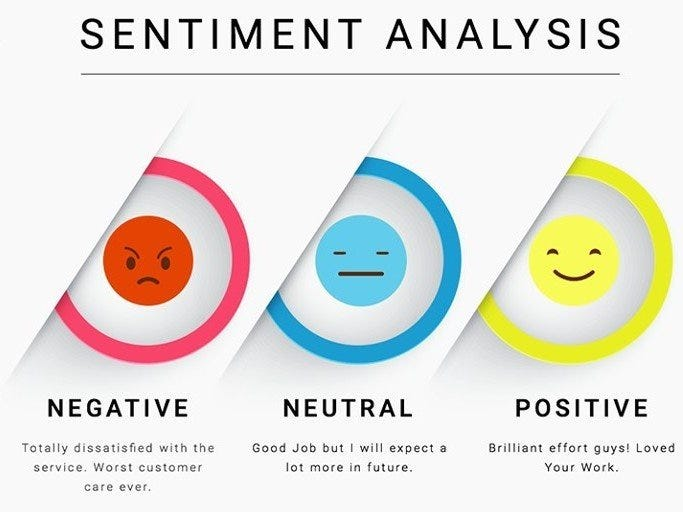

In [43]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [44]:
# 1. Load and Preprocess Data
data = pd.read_csv("IMDB_Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [45]:
# Define vocabulary size and embedding dimension
vocab_size = 10000
max_length = 120
embedding_dim = 64

In [46]:
# Text preprocessing
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
padded = pad_sequences(sequences, maxlen=max_length)

In [6]:

print(padded)

[[3024  834  180 ...  125 4103  486]
 [   1  150   23 ... 1977   69  221]
 [6126 6686 1574 ...   63   16  350]
 ...
 [  10  110  210 ...    2    2 6050]
 [   6 7956    2 ...   67  739   42]
 [  97    5   26 ...  794   11   17]]


In [47]:
# Convert Sentiment Labels to Integer
sentiment_mapping= {'positive':0, 'negative': 1, 'neutral': 2}
data['sentiment']= data['sentiment'].map(sentiment_mapping)

In [48]:
# Split into train and test
X_train,X_test,y_train,y_test = train_test_split(padded,data['sentiment'], test_size=0.2)

In [49]:
# One-hot Encodes Sentiment Labels
num_classes = 3
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



In [50]:
# Build the GRU model
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length= max_length))
model.add(GRU(64)) # Adjust GRU units as needed
model.add(Dense(3,activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Train the model
model.fit(X_train, y_train, epochs= 10, batch_size=64)

Epoch 1/10
625/625 [==============================] - 59s 91ms/step - loss: 0.4514 - accuracy: 0.7702
Epoch 2/10
625/625 [==============================] - 56s 90ms/step - loss: 0.2428 - accuracy: 0.9019
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1857 - accuracy: 0.9291
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1309 - accuracy: 0.9540
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0868 - accuracy: 0.9715
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0547 - accuracy: 0.9835
Epoch 7/10
625/625 [==============================] - 54s 87ms/step - loss: 0.0409 - accuracy: 0.9876
Epoch 8/10
625/625 [==============================] - 57s 92ms/step - loss: 0.0250 - accuracy: 0.9931
Epoch 9/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0195 - accuracy: 0.9949
Epoch 10/10
625/625 [==============================] - 52s 84ms/step - loss: 0.014

In [52]:
#Evaluate the model
test_loss, test_accuaracy = model.evaluate(X_test, y_test)
print('Test Accuaracy:',test_accuaracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.7577 - accuracy: 0.8606
Test Accuaracy: 0.8605999946594238


In [53]:
# 7. Make a predictions on New Reviews
def predict_sentiment(new_review):
  new_sequence = tokenizer.texts_to_sequences([new_review])
  new_padded= pad_sequences(new_sequence, maxlen = max_length)
  probabilities = model.predict(new_padded)
  sentiment_class = np.argmax(probabilities)
  labels = ['positive','negative','neatral']
  return labels[sentiment_class]

In [56]:
# Example Usage
new_review= 'This moview was truly fantastic and engaging!'
predicted_sentiment = predict_sentiment(new_review)
print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 1s 603ms/step
Predicted Sentiment: positive
